# **Group Project A Report**

## *Can We Predict the Presence of Heart Diseases from Observing Resting Blood Pressure and Serum Cholesterol?* 

#### by Oskar Chen

## **Introduction:**

This is a study based on the findings presented in the database *Heart Disease*, which was donated in 1988. The database can be found on UC Irvine Machine Learning Repository. It includes "76 attributes, but all published experiments refer to using a subset of 14 of them" (Detrano et al., 1988). As the name implies, it is made up of 14 attributes that  include a series of metrics related to a patient's health, and a field that indicates the presence of heart disease.  

Heart disease is a serious issue, and many in Canada are affected by it. A study by the government of Canada revealed that "about 1 in 12 (or 2.6 million) Canadian adults age 20 and over live with diagnosed heart disease" and that "every hour, about 14 Canadian adults age 20 and over with diagnosed heart disease die" (Canada, 2022). These number are significant, and more awareness must be raised. 

We are looking to answer a classification problem: **whether the presence of heart diseases can be predicted through observing resting blood pressure and serum cholesterol**. Zhang et al. (2016) describe an association of a "high natural resting heart rate... with traditional risk factors for cardiovascular diseases" (p. 384). Contradictory to this finding, resting heart rate "has not been included for cardiovascular risk assessment in European and US guidelines... [despite its] potential importance" (Zhang et al., 1998, p. 384). Serum cholesterol, on the other hand, has also long been established to be associated with heart diseases (Harvard, 2020). It would be interesting to apply the methods that we have been taught in DSCI 100 to see if these correlations show up sufficiently in a classification model that we will train. 

From the database, we will be using the *processed.cleveland.data* file, as it has been used in other studies and has missing values filtered out. Below, the metrics of the processed data will be given:

 1. (age) - age in years      
 2. (sex) - (1 = male; 0 = female)      
 3. (cp) - chest pain type
        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic        
 4. (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)   
 5. (chol) - serum cholesterol in mg/dl      
 6. (fbs) - (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
 7. (restecg) - resting electrocardiographic results
        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria    
 8. (thalach) - maximum heart rate achieved   
 9. (exang) - exercise induced angina (1 = yes; 0 = no)     
 10. (oldpeak) - ST depression induced by exercise relative to rest   
 11. (slope) - the slope of the peak exercise ST segment
        * Value 1: upsloping
        * Value 2: flat
        * Value 3: downsloping   
 12. (ca) - number of major vessels (0-3) colored by flourosopy        
 13. (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect      
 14. (num) - diagnosis of heart disease (angiographic disease status)
        * Value 0: < 50% diameter narrowing
        * Value 1: > 50% diameter narrowing
            (in any major vessel: attributes 59 through 68 are vessels)

(Detrano et al., 1998)

## **Methods and Results:**

The analysis will be conducted by using a K-nearest neighbor classification model. We are using resting blood pressure (trestbps) and cholesterol (chol) to predict a diagnosis of heart disease (num). The predicted attribute is represented by the numbers 0-4, with 0 signifying an absence of heart disease. 

We will use 75% of the data for training, and the rest for testing. The training data will be shuffled and stratified, and a 10-fold cross-validation will be used to pick a value for *k*. For visualization, we will show scatter plots with cholesterol against blood pressure. 

(Chen, 2023) 

*sidenote: this was written by me from the proposal, the reason that it bears some resemblance to the Method part of Group 1 is because I was a part of that group, before I left the group to do this project on my own. Professor Chen has said that, in the interest of time, I could build on the proposal of that group. I have chosen to use only part of the answer that I personally authored*

### Exploratory Analysis on the Data

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.plot.width = 12, repr.plot.height = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [13]:
heart_data <- read_csv("https://raw.githubusercontent.com/oskarjychen/dsci100_group_a/main/data/processed.cleveland.data",
                       col_names = FALSE)

selected_heart_data <- heart_data |>
    select(trestbps = X4, chol = X5, num = X14) 
glimpse(selected_heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 3
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ num      <dbl> 0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0…


*figure 1*

Since the *num* variable is in essence categorical, we will creat a new binary column to signify whether heart disease in present in the patient. The new column will be called heart_disease, with the *num* value of 0 represented by "none", and the values of 1, 2, 3, 4 being represented by "present".

We will also be changing both *num* and *heart_disease* to factor columns:

In [3]:
clean_heart_data <- selected_heart_data |>
    mutate(heart_disease = ifelse(num > 0, "present", "none")) |>
    mutate(num = as_factor(num), heart_disease = as_factor(heart_disease))
clean_heart_data

trestbps,chol,num,heart_disease
<dbl>,<dbl>,<fct>,<fct>
145,233,0,none
160,286,2,present
120,229,1,present
130,250,0,none
130,204,0,none
120,236,0,none
140,268,3,present
120,354,0,none
130,254,2,present


*figure 2*

Now we can look at how the presence of heart diseases in this data frame is distributed:

In [4]:
num_obs <- nrow(clean_heart_data)
clean_heart_data |>
    group_by(heart_disease) |>
    summarize(count = n(), percentage = n()/num_obs * 100)

heart_disease,count,percentage
<fct>,<int>,<dbl>
none,164,54.12541
present,139,45.87459


*figure 3*

We can see that patients with no heart disease account for 54.13%, while those with heart disease make up for around 45.87%. Next we will visualize the data to see if there are any easily detectable relationships:

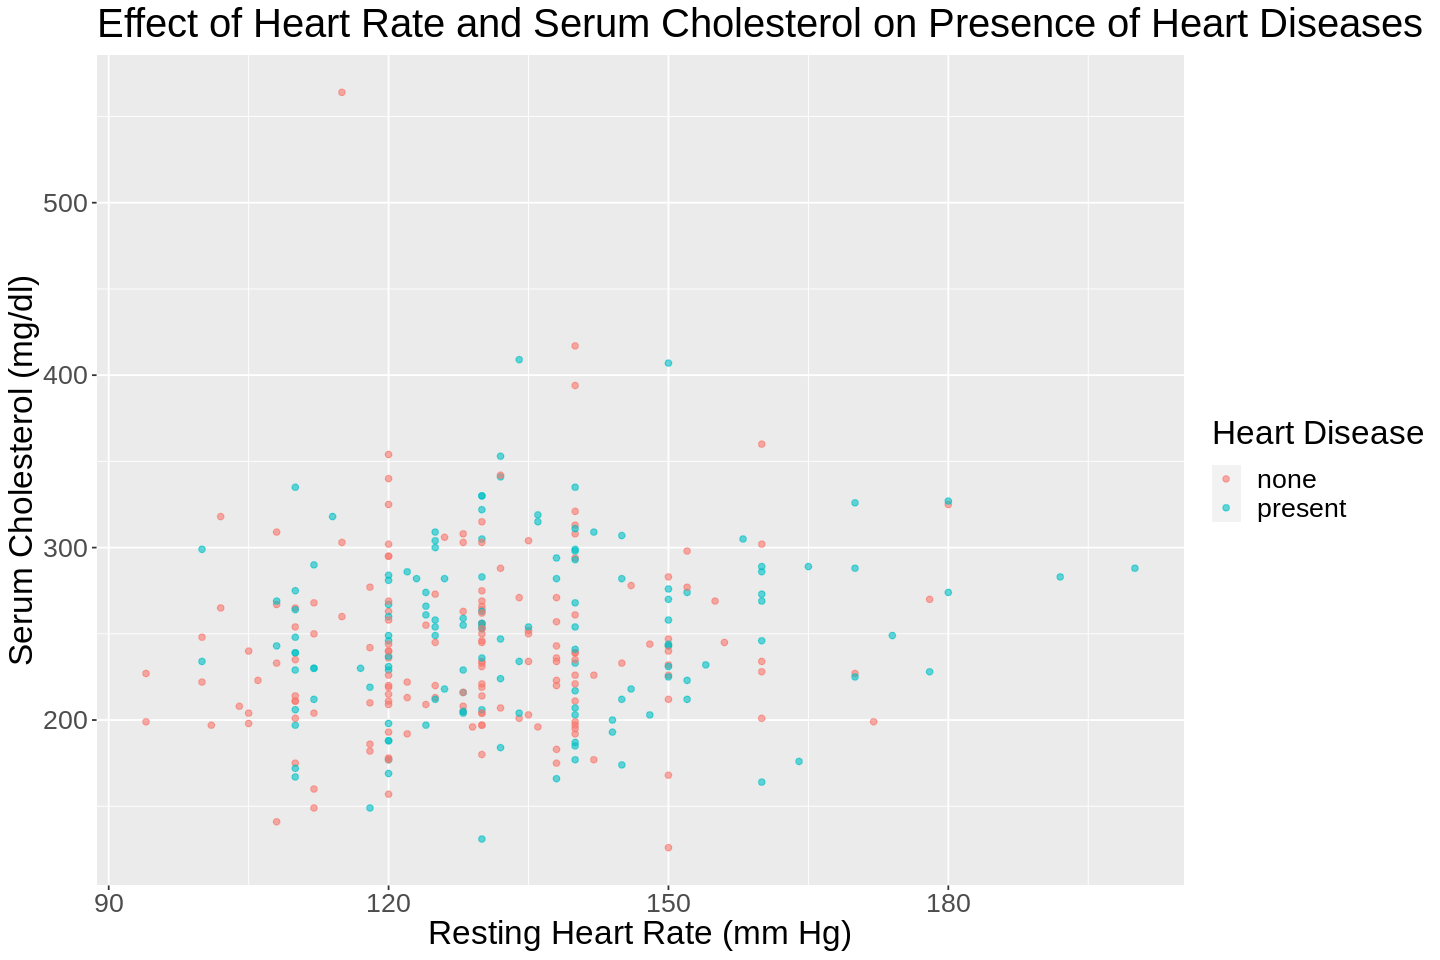

In [15]:
bps_chol <- clean_heart_data |>
    ggplot(aes(x = trestbps, y = chol, color = heart_disease)) +
    geom_point(alpha = 0.6) +
    labs(x = "Resting Heart Rate (mm Hg)", 
         y = "Serum Cholesterol (mg/dl)",
         color = "Heart Disease",
         title = "Effect of Heart Rate and Serum Cholesterol on Presence of Heart Diseases") +
    theme(text = element_text(size = 20))
bps_chol

*figure 4*

There does not seem to be a clear, discernable trend to the human eye. We can see, generally, that higher serum cholesterol and higher resting heart rate seem to lead to the presence of heart diseases, but it is not a very strong relationship. We may need to explore further to see if there really is any correlation. Another thing to keep in mind is that this data is not yet standarized, therefore there may be an underlyig trend which is hard to tell from *figure 4*

### Evaluation and Tuning

We will now start to build a predictive model. First of all, we will set a seed so that reproduction of the randomness in our results would be possible. Then we will be splitting the data into a training set, and a testing set:

In [6]:
set.seed(228)

heart_split <- initial_split(clean_heart_data, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_proportions <- heart_train |>
    group_by(heart_disease) |>
    summarize(count = n()) |>
    mutate(percent = count/nrow(heart_train))
heart_proportions

heart_disease,count,percent
<fct>,<int>,<dbl>
none,123,0.5418502
present,104,0.4581498


*figure 5*

As we can see, the proportions of the two classes are very similar to the proportions of the origianl data frame. 

In the next step, we will be tuning our classifier model. This involves both cross-validation and parameter value selection, or the selection of a value for *k*. 

For cross-validation, since this dataset is rather small, we likely can afford the computational costs of using a 10-fold cross validation. This will theoretically get us a lower standard error in the model. 

For the parameter value selection, we will test a range of values from *k* = 1 to *k* = 100, by increments of 5. The reason that we have done this is similar to that of the above: this dataset being rather small. In a larger data frame, testing out so many values for the parameter would be time-consuming and mostly not worth the computational costs. 

For the actual steps, we will be designing a recipe and a spec for the model. The recipe will standarize the training data, while the spec will designate a K-nearest neighbor classification method for the model, as well as include a tune() function to test different values for *k*

After that, we will collect the metric to see the accuracies for each value of *k*

In [10]:
heart_vfold <- vfold_cv(heart_train, v = 10, strata = heart_disease)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_recipe <- recipe(heart_disease ~ trestbps + chol, data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- heart_results |>
    filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4836133,10,0.02933749,Preprocessor1_Model01
6,accuracy,binary,0.5199934,10,0.03268188,Preprocessor1_Model02
11,accuracy,binary,0.5538702,10,0.02753238,Preprocessor1_Model03
16,accuracy,binary,0.5410079,10,0.02954356,Preprocessor1_Model04
21,accuracy,binary,0.5156291,10,0.03066828,Preprocessor1_Model05
26,accuracy,binary,0.5163867,10,0.02080380,Preprocessor1_Model06
31,accuracy,binary,0.5396739,10,0.03530595,Preprocessor1_Model07
36,accuracy,binary,0.5165843,10,0.03403415,Preprocessor1_Model08
41,accuracy,binary,0.5252964,10,0.03459330,Preprocessor1_Model09


*figure 6*

Next we will plot the accuracy as a function of the value of *k*:

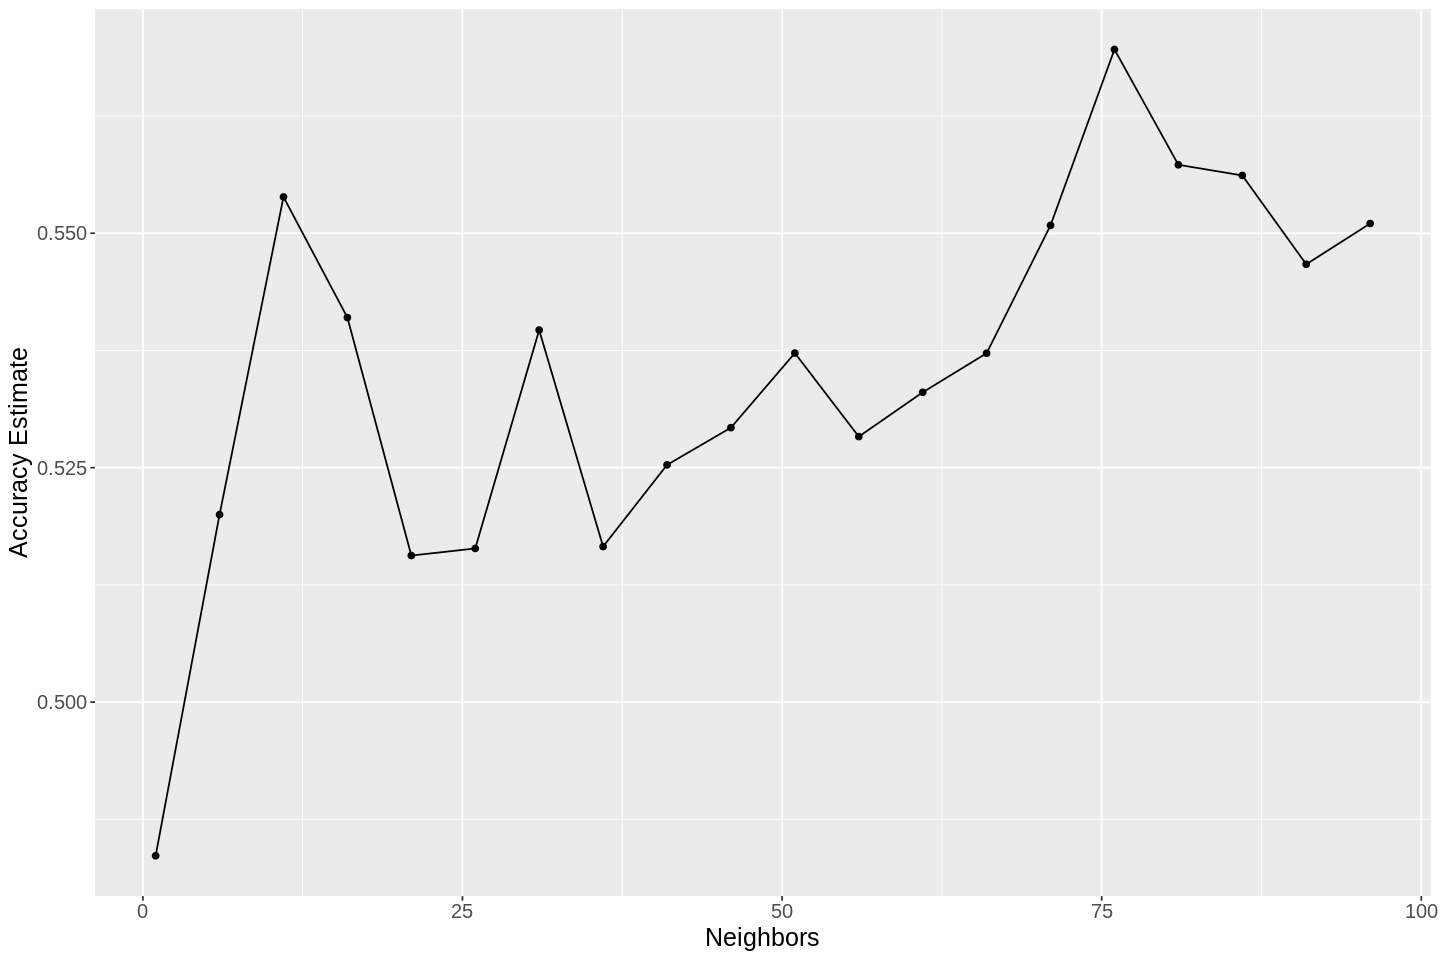

In [12]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") + 
    theme(text = element_text(size = 15))

accuracy_vs_k

*figure 7*

It looks like *k* = 76 is the optimal value as it provides the highest accuracy at 0.5695982. The nearby values also do not have accuracies that drop off drastically. Therefore, we will use 76 as our value for *k*

It needs to be stated, however, that the accuracy for our model is quite low, being only marginally higher than the baseline of the majority classifer, which is at 0.5419. It is resonable to assume that this classification model is not a very good one. But we will still apply it to the testing set for a confirmation of that suspicion:

In [24]:
knn_final_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = 76) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_final_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_final_tune) |>
    fit(data = heart_train)

heart_test_predictions <- predict(heart_final_fit, heart_test) |>
    bind_cols(heart_test)

heart_test_predictions |>
    metrics(truth = heart_disease, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6184211


*figure 8*

We will also present the predictions in a confusion matrix to see if there are trends:

In [25]:
confusion <- heart_test_predictions |>
             conf_mat(truth = heart_disease, estimate = .pred_class)
confusion

          Truth
Prediction none present
   none      35      23
   present    6      12

*figure 9*

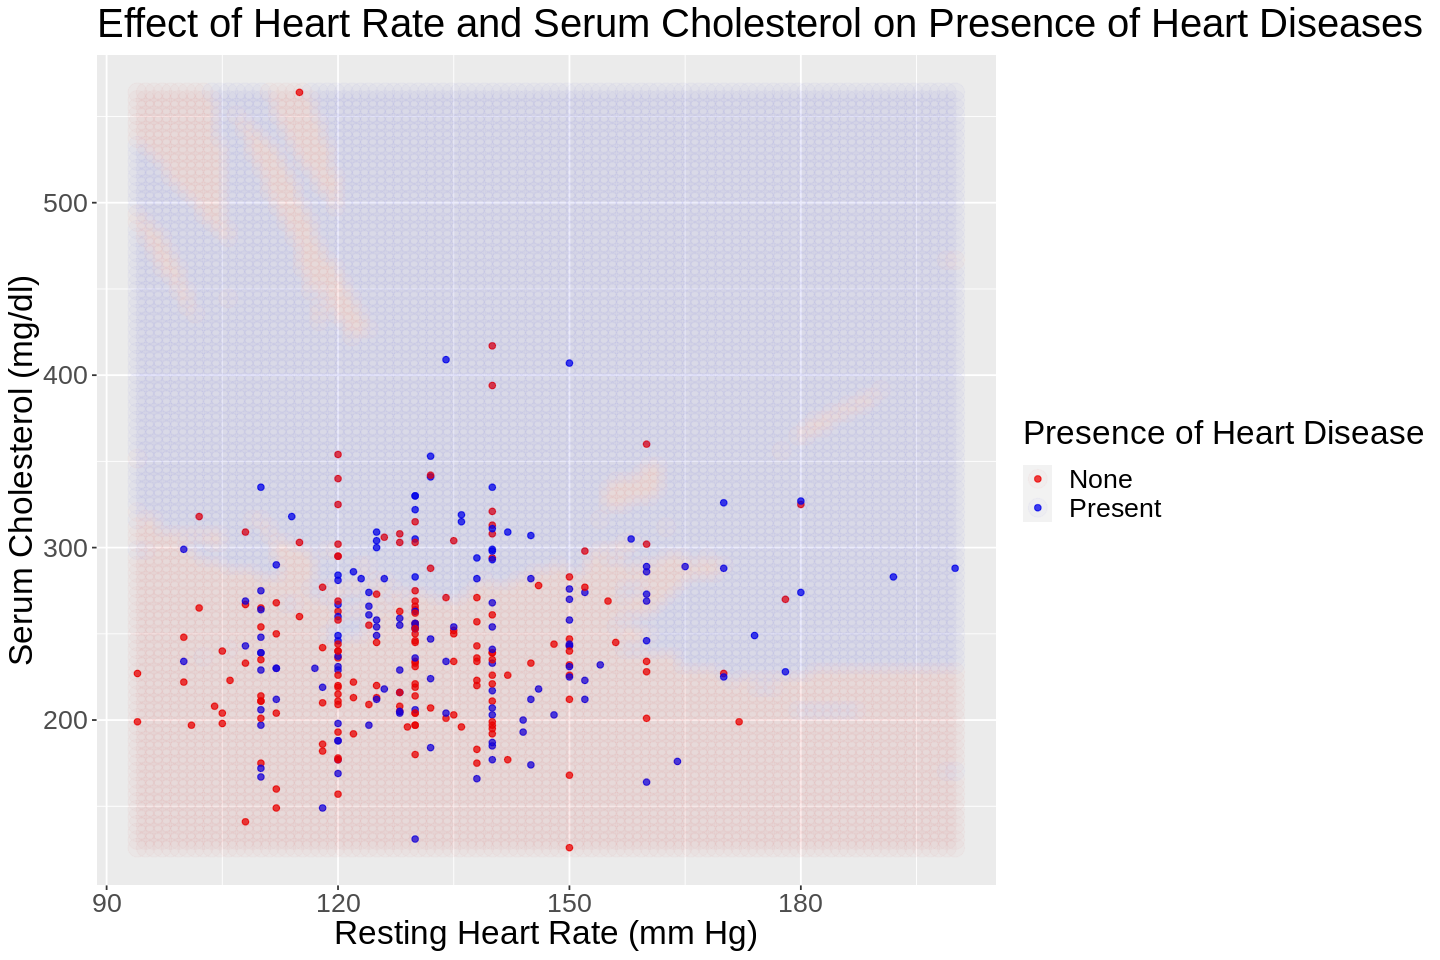

In [33]:
chol_grid <- seq(min(clean_heart_data$chol), 
             max(clean_heart_data$chol), 
             length.out = 100)
trestbps_grid <- seq(min(clean_heart_data$trestbps), 
                 max(clean_heart_data$trestbps), 
                 length.out = 100)
ctgrid <- as_tibble(expand.grid(chol = chol_grid, 
                                trestbps = trestbps_grid))

knnPredGrid <- predict(heart_final_fit, ctgrid)

prediction_table <- bind_cols(knnPredGrid, ctgrid) |> 
  rename(heart_disease = .pred_class)


wkflw_plot <-
    ggplot() +
    geom_point(data = clean_heart_data, 
               mapping = aes(x = trestbps, 
                            y = chol, 
                            color = heart_disease), 
               alpha = 0.75) +
    geom_point(data = prediction_table, 
               mapping = aes(x = trestbps, 
                             y = chol, 
                            color = heart_disease), 
               alpha = 0.02, 
               size = 5) +
    labs(color = "Presence of Heart Disease", 
         x = "Resting Heart Rate (mm Hg)", 
         y = "Serum Cholesterol (mg/dl)",
         title = "Effect of Heart Rate and Serum Cholesterol on Presence of Heart Diseases") +
    scale_color_manual(labels = c("None", "Present"),
                       values = c("red2", "blue2")) +
    theme(text = element_text(size = 20))

wkflw_plot


*figure 10*

## **Discussion of Findings:**

## **References**:

Canada, P. H. A. of. (2022, July 28). *Government of Canada*. Canada.ca. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html 

Detrano, R., Janosi, A., Pfisterer, M., &amp; Steinbrunn, W. (1988, June 30). *Heart Disease*. UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease 

Harvard T.H. Chan School of Public Health. (2020, March 2). *Cholesterol*. The Nutrition Source. https://www.hsph.harvard.edu/nutritionsource/what-should-you-eat/fats-and-cholesterol/cholesterol/ 

Zhang, D., Wang, W., &amp; Li, F. (2016). Association Between Resting Heart Rate and Coronary Artery Disease, Stroke, Sudden Death and Noncardiovascular Diseases: A Meta-Analysis. *Canadian Medical Association Journal*, 188(15). https://doi.org/10.1503/cmaj.160050 